# Classification Models

There are two main categories of classification models:
1. Binary classification models - there are only two possible outcomes
2. Multiclass classification - there are more than two possible outcomes

There are also other less common categories like multilable classification models which can classify a single input as belonging to several classes. There are also some models which can predict that an input belongs to none of the possible classes.

Most of the things that are important in regression also apply to classification models, with the main difference being the way that accuracy is measured. In classification there isn't a R-squared metric but in its place are other measured like precision, recall, specificity, sensitivity and F1 score. One of the most important things in classification is to know which accuracy metric to use based on the model's intended application.

## Logistic Regression

Logistic Regression is an algorithm that is used only for classification. It analyzes a distribution of data and fits an equation to it that defines the porbability that a given sample belogns to each of the possible classes and it predicts that it belongs to the class which has a higher probability. Despite the name logistic regression is used for classificatin, its purpose is not to create regression models but to quantify probabilities for the purpose of classifying input samples.

The algorithm draws a curve that given an x shows the probability that a point with that x belongs to class 1. It charts a function known as the logistic function (also known as the logit function). The function for logistic regression is defined as:

$ y = \frac{1}{1+e^{-(mx + b)}}$

Where x is the input value and m and b are parameters learned during training. The reason it is called logistic regression is that the exponent of e happens to be the equation for linear regression.

To find the optimum values Scikit defaults to a numberical optimization algorithm known as Limited-memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS).

## Accuracy Measures for Classification Models

For a classifier the score function returns the sum of the true positives and the true negatives divided by the total number of samples. This is sometimes referred to as the model's accuracy score. Often data scientists measure a classification model's precision and recall.

1. Precision: Computed by dividing the number of true positives by the sum of the true positives and false positives
2. Recall: Computed by dividing the number of true positives by the sum of true positives and false negatives

Precision imposes a penalty for false positives while recall penalizes false negatives. Precision quantifies how confident you can be that a positive prediction is accurate, while recall quantifies the model's ability to accurately identify positive samples. The two can be combined into one score called the F1 score.

The decision on which one to use comes to deciding on the cost of false positives or the cost of false negatives. If the cost of false positives is high then percision should be used. If the cost of false negatives is high then recall should be used.

An additional metric that applies only to binary classification is the receiver operating characteristic (ROC) curve, which plots the true-positive rate (TPR) agains the false-positive rate (FPR) at various probability thresholds. Data scientists often use the area under the curve (AUC or ROC AUC) as an overall measure of accuracy.

Another way to assess the accuracy of a classification model is to plot a confusion matrix. It shows for each class how the model performed during testing.

Other metrics include sensitivity and specificity. Sensitivity is identical to recall. Specificity is recall for negative class rather than positive class and it is calculted by dividing the number of true negatives by the sum of true negatives and false positives.

## Categorical Data

Categorical data is data that contains strings such as "male" and "female" or "red", "green" and "blue". Categorical values have to be converted into numbers. Two popular techniques for converting categorical values into numbreical values are:

1. Label Encoding - replaces categorical values with integers, if there are three unique values in a column, label encoding replaces them with 0s, 1s, and 2s.
2. One-hot encoding - adds one column to the dataset for each unique value in a categorical column and fills the encoded columns with 1s and 0s.

One-hot encoding us generarly used more often as it gives every unique value an equal weight whereas label encoding implies that some values might be more important than others for example that "male" (1) is more important than "female" (0).

## Classifying Passenger Who Sailed on the Titanic

In [1]:
import pandas as pd

df = pd.read_csv('Data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The Age column is missing some values, one way  to solve this is to replace the missing values with the mean of all the other ages, this approach is called 

In [3]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'],dtype=int)
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


In [4]:
df['Survived'].value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 0)

After removing the missing values 424 passengers did not survive and 290 passengers survived, we want the training dataset and the testing dataset to contain a similar amount of both classes, that is why we use the parameter stratify=y.

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

np.float64(0.7857480547621394)

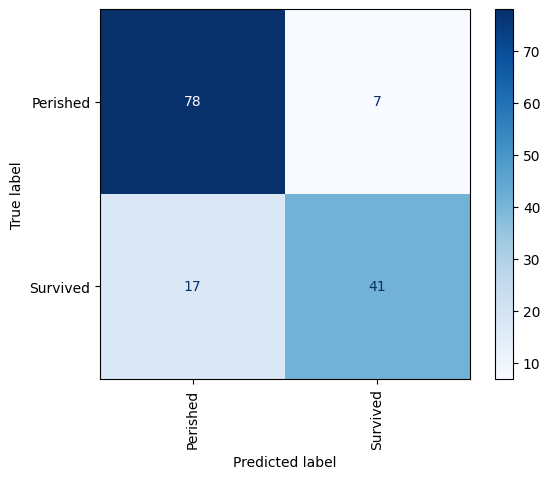

In [8]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test, display_labels=['Perished', 'Survived'],
                   cmap='Blues', xticks_rotation='vertical')

In [9]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


In [10]:
test = pd.DataFrame({ 'Age': [20], 'Sex_female': [1], 'Sex_male': [0],
                      'Pclass_1': [1], 'Pclass_2': [0], 'Pclass_3': [0] })
probability = model.predict_proba(test)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 94.1%


## Detecting Credit Card Fraud

In [11]:
df = pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y, random_state=0)

In [15]:
lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


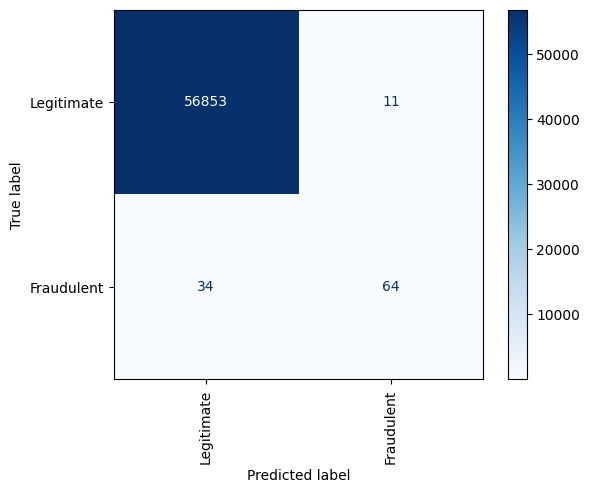

In [16]:
labels= ['Legitimate', 'Fraudulent']
cmd.from_estimator(lr_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

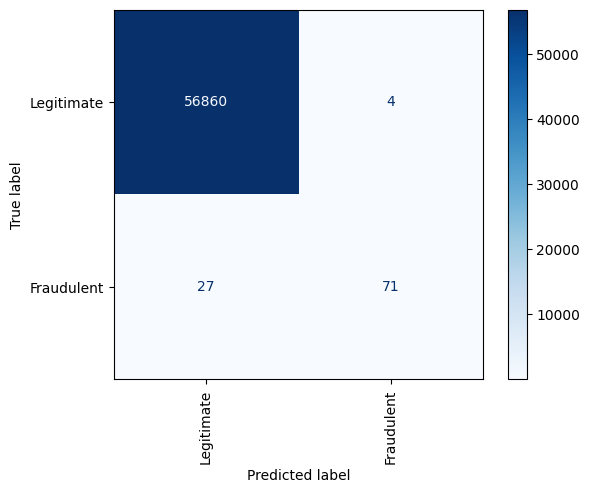

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

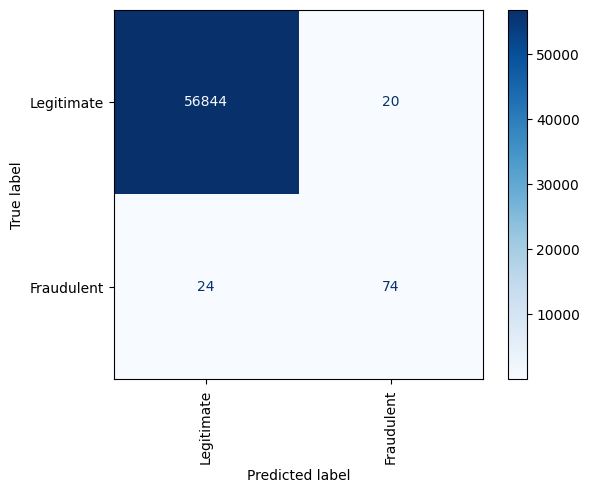

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

cmd.from_estimator(gbm_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

## Multiclass Classification

Logistic regression usually works only with binary classification. Scikit learn makes logistic regression work for multiclass classification scenarions by applying two strategies:

1. Multinomial logistic regression - replaces the logistic function with a softmax function that yields multiple probabilities (one per class)
2. One-vs-rest or one-vs-all - trains n binary classification models where n is the number of classes that the model can predict, each of the n models pairs one class agains all other classes and when the model is asked to make a prediction it runs the input through all n models and uses the output from the one that yields the highest probability.

## Building a Digit Recognition Model

In [19]:
from sklearn import datasets

digits = datasets.load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: ' + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


In [20]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

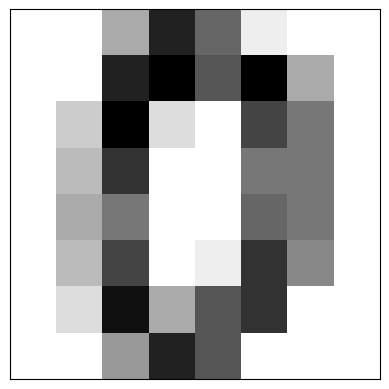

In [22]:
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [23]:
digits.target[0]

np.int64(0)

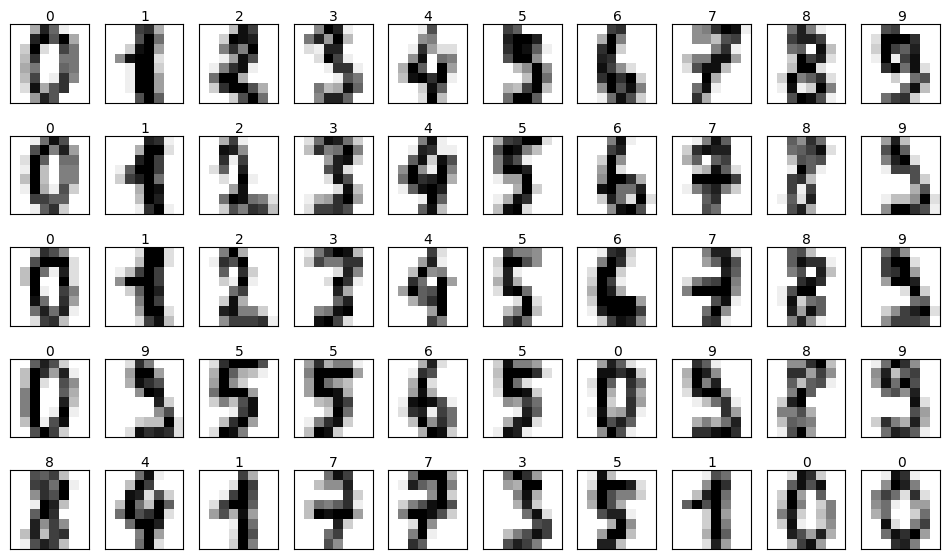

In [25]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

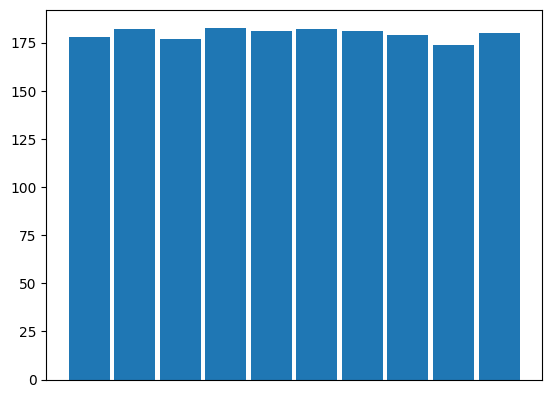

In [26]:
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [28]:
model.score(x_test, y_test)

0.9694444444444444

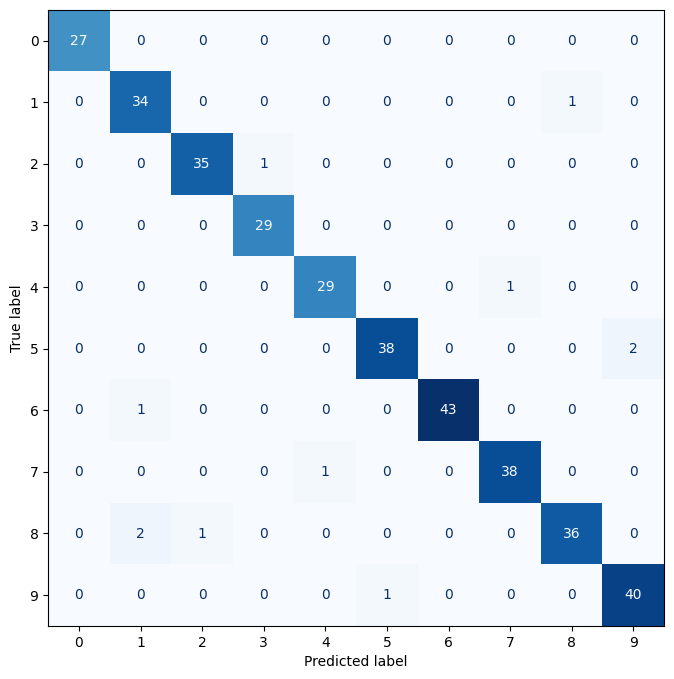

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid(False)
cmd.from_estimator(model, x_test, y_test, cmap='Blues', colorbar=False, ax=ax)

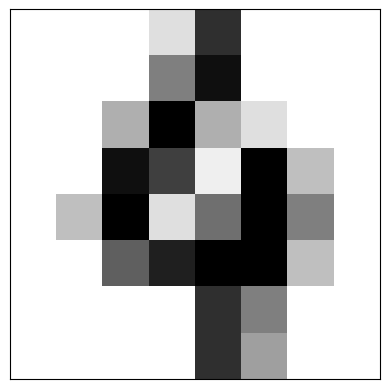

In [31]:
import seaborn as sns

sns.reset_orig()
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)

In [32]:
model.predict([digits.data[100]])[0]

np.int64(4)

In [33]:
model.predict_proba([digits.data[100]])

array([[1.62923682e-11, 1.52824153e-07, 1.92471634e-21, 1.56325670e-21,
        9.99999845e-01, 4.40162059e-16, 2.06342211e-09, 1.24640083e-11,
        2.98566640e-13, 4.98659685e-20]])

In [34]:
model.predict_proba([digits.data[100]])[0][4]

np.float64(0.9999998450833691)